# SarXarray Demo Notebook

In this Jupyter Notebook, we demonstrate the following operations using `sarxarray`:

- Load an SLC stack in binary format into a `xarray.Dataset` object;
- Append variable data fields;
- Create an MRM of a subset of the SLC stack;
- Apply point selection to a subset of the SLC stack;
- Export the selection results in Zarr format

The data needed for this Notebook is sored in the following pth on Spider: `/project/caroline/Public/demo_sarxarray`.

In [1]:
# To execute this notebook, you may need to install matplotlib
# For example, execute this block to install matplotlib into "sarxarray" environment
# ! conda install -n sarxarray -c conda-forge matplotlib -y

In [2]:
import numpy as np
from pathlib import Path
import sarxarray

### Load a SLC stack

In [3]:
# You many need to change this cell to your local data directory
path = Path('../../data/nl_veenweiden_s1_asc_t088/')

In [4]:
# Make a list of SLCs to read
f_slc = 'slc_srd_nl_veenweiden.raw' 
list_slcs = [p/f_slc for p in path.rglob("????????")]
list_slcs

[PosixPath('../../data/nl_veenweiden_s1_asc_t088/20210407/slc_srd_nl_veenweiden.raw'),
 PosixPath('../../data/nl_veenweiden_s1_asc_t088/20210413/slc_srd_nl_veenweiden.raw'),
 PosixPath('../../data/nl_veenweiden_s1_asc_t088/20210419/slc_srd_nl_veenweiden.raw')]

In [5]:
# Metadata of the stack
shape=(9914, 41174)
dtype = np.dtype([('re', np.float32), ('im', np.float32)])

In [6]:
stack = sarxarray.from_binary(list_slcs, shape, dtype=dtype)
stack

<xarray.Dataset>
Dimensions:    (azimuth: 9914, range: 41174, time: 3)
Coordinates:
  * azimuth    (azimuth) int64 0 1 2 3 4 5 6 ... 9908 9909 9910 9911 9912 9913
  * range      (range) int64 0 1 2 3 4 5 ... 41168 41169 41170 41171 41172 41173
  * time       (time) int64 0 1 2
Data variables:
    complex    (azimuth, range, time) complex64 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>
    amplitude  (azimuth, range, time) float16 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>
    phase      (azimuth, range, time) float16 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>

In [7]:
stack.complex

<xarray.DataArray 'complex' (azimuth: 9914, range: 41174, time: 3)>
dask.array<transpose, shape=(9914, 41174, 3), dtype=complex64, chunksize=(5, 41174, 1), chunktype=numpy.ndarray>
Coordinates:
  * azimuth  (azimuth) int64 0 1 2 3 4 5 6 ... 9908 9909 9910 9911 9912 9913
  * range    (range) int64 0 1 2 3 4 5 6 ... 41168 41169 41170 41171 41172 41173
  * time     (time) int64 0 1 2

### Append a new data field: `h2ph`

In [8]:
# Make a list of h2ph files to read
f_h2ph = 'h2ph_nl_veenweiden.raw' 
list_h2phs = [p/f_h2ph for p in path.rglob("????????")]
list_h2phs

[PosixPath('../../data/nl_veenweiden_s1_asc_t088/20210407/h2ph_nl_veenweiden.raw'),
 PosixPath('../../data/nl_veenweiden_s1_asc_t088/20210413/h2ph_nl_veenweiden.raw'),
 PosixPath('../../data/nl_veenweiden_s1_asc_t088/20210419/h2ph_nl_veenweiden.raw')]

In [9]:
h2phs = sarxarray.from_binary(list_h2phs, shape, vlabel="h2ph", dtype=np.float32)
h2phs

<xarray.Dataset>
Dimensions:  (azimuth: 9914, range: 41174, time: 3)
Coordinates:
  * azimuth  (azimuth) int64 0 1 2 3 4 5 6 ... 9908 9909 9910 9911 9912 9913
  * range    (range) int64 0 1 2 3 4 5 6 ... 41168 41169 41170 41171 41172 41173
  * time     (time) int64 0 1 2
Data variables:
    h2ph     (azimuth, range, time) float32 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>

In [10]:
stack = stack.merge(h2phs)
stack

<xarray.Dataset>
Dimensions:    (azimuth: 9914, range: 41174, time: 3)
Coordinates:
  * azimuth    (azimuth) int64 0 1 2 3 4 5 6 ... 9908 9909 9910 9911 9912 9913
  * range      (range) int64 0 1 2 3 4 5 ... 41168 41169 41170 41171 41172 41173
  * time       (time) int64 0 1 2
Data variables:
    complex    (azimuth, range, time) complex64 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>
    amplitude  (azimuth, range, time) float16 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>
    phase      (azimuth, range, time) float16 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>
    h2ph       (azimuth, range, time) float32 dask.array<chunksize=(5, 41174, 1), meta=np.ndarray>

### Create MRM of a subset

In [11]:
mrm = stack.slcstack.mrm()
mrm

<xarray.DataArray 'amplitude' (azimuth: 9914, range: 41174)>
dask.array<mean_agg-aggregate, shape=(9914, 41174), dtype=float16, chunksize=(5, 41174), chunktype=numpy.ndarray>
Coordinates:
  * azimuth  (azimuth) int64 0 1 2 3 4 5 6 ... 9908 9909 9910 9911 9912 9913
  * range    (range) int64 0 1 2 3 4 5 6 ... 41168 41169 41170 41171 41172 41173

In [12]:
# Compute a subset of the mrm
mrm_subset = mrm[5000:5500, 10000:10500]
mrm_subset = mrm_subset.compute()

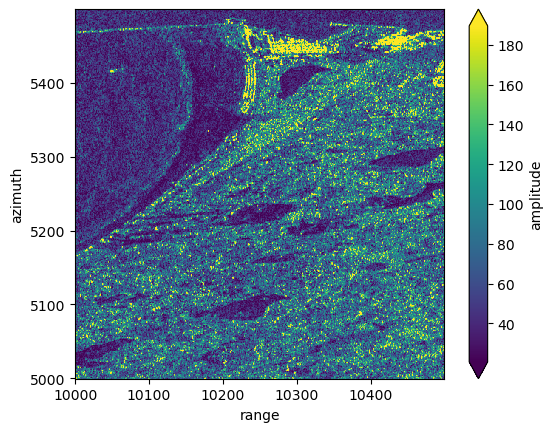

In [14]:
# Visualize
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.imshow(mrm_subset)
mrm_subset.plot(robust=True, ax=ax)

### Export to a Space Time Matrix

In [15]:
stack_subset = stack.sel(azimuth=range(6000,6500), range=range(11000,11500))

In [16]:
stm = stack_subset.slcstack.point_selection(threshold=2, method="amplitude_dispersion")
stm

/home/ouku/miniconda3/envs/sarxarray/lib/python3.10/site-packages/dask/array/reductions.py:758: RuntimeWarning: overflow encountered in square
  ns * inner_term**order, axis=axis, **kwargs
/home/ouku/miniconda3/envs/sarxarray/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ouku/miniconda3/envs/sarxarray/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/ouku/miniconda3/envs/sarxarray/lib/python3.10/site-packages/dask/array/reductions.py:758: RuntimeWarning: overflow encountered in square
  ns * inner_term**order, axis=axis, **kwargs
/home/ouku/miniconda3/envs/sarxarray/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ouku/miniconda3/envs

<xarray.Dataset>
Dimensions:    (time: 3, points: 141180)
Coordinates:
  * time       (time) int64 0 1 2
    azimuth    (points) int64 dask.array<chunksize=(1000,), meta=np.ndarray>
    range      (points) int64 dask.array<chunksize=(1000,), meta=np.ndarray>
  * points     (points) int64 0 1 2 3 4 5 ... 141175 141176 141177 141178 141179
Data variables:
    complex    (time, points) complex128 dask.array<chunksize=(3, 1000), meta=np.ndarray>
    amplitude  (time, points) float16 dask.array<chunksize=(3, 1000), meta=np.ndarray>
    phase      (time, points) float16 dask.array<chunksize=(3, 1000), meta=np.ndarray>
    h2ph       (time, points) float32 dask.array<chunksize=(3, 1000), meta=np.ndarray>

In [17]:
# Export to Zarr
stm.to_zarr("stm.zarr")

In [18]:
# Load exported STM in Zarr
import xarray as xr
stm_read = xr.open_zarr("stm.zarr")
stm_read

<xarray.Dataset>
Dimensions:    (time: 3, points: 141180)
Coordinates:
    azimuth    (points) int64 dask.array<chunksize=(1000,), meta=np.ndarray>
  * points     (points) int64 0 1 2 3 4 5 ... 141175 141176 141177 141178 141179
    range      (points) int64 dask.array<chunksize=(1000,), meta=np.ndarray>
  * time       (time) int64 0 1 2
Data variables:
    amplitude  (time, points) float16 dask.array<chunksize=(3, 1000), meta=np.ndarray>
    complex    (time, points) complex128 dask.array<chunksize=(3, 1000), meta=np.ndarray>
    h2ph       (time, points) float32 dask.array<chunksize=(3, 1000), meta=np.ndarray>
    phase      (time, points) float16 dask.array<chunksize=(3, 1000), meta=np.ndarray>